In [1]:
library(plyr)
library(lattice)
library(reshape2)
library(ggplot2)
library(pROC)
library(glmnet)
library(class)
library(plotmo)
library(MASS)
library(tidyverse)
library(adabag)
library(caret)

Warning message:
"package 'plyr' was built under R version 3.5.3"Warning message:
"package 'lattice' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'pROC' was built under R version 3.5.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.5.3"Loaded glmnet 2.0-18


Attaching package: 'glmnet'

The following object is masked from 'package:pROC':

    auc

Warning message:
"package 'plotmo' was built under R version 3.5.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.5.2"Loading required package: plotrix
Warning message:
"package 'plotrix' was built under R version 3.5.3"L

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

# Statistical Learning Project

In this project i've decided to analyze the cars sold on Craigslist, an American website that provides a wide variety of Services, including the reselling of used cars

## Exploratory Analysis

### Clean Data

In [3]:
Cars <- read.csv('./datasets/craigslistVehiclesFull.csv')

In [4]:
head(Cars)

url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
https://marshall.craigslist.org/cto/d/2010-dodge-challenger-se/6717448841.html,marshall,11900,2010,dodge,challenger se,good,6 cylinders,gas,43600,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNKZ_600x450.jpg,43.47750,-96.70410,46083,Lincoln,46,SD,South Dakota,38
https://marshall.craigslist.org/cto/d/fleetwood-wilderness-trailer/6713515522.html,marshall,1515,1999,,fleetwood,,,gas,NA,...,,https://images.craigslist.org/00M0M_irjh7SjEcUc_600x450.jpg,44.76120,-96.69070,46039,Deuel,46,SD,South Dakota,38
https://marshall.craigslist.org/cto/d/2008-ford-150-super-charged/6717040051.html,marshall,17550,2008,ford,f-150,,,gas,NA,...,,https://images.craigslist.org/00s0s_eL2XFhEUcx3_600x450.jpg,44.14150,-103.20520,46093,Meade,46,SD,South Dakota,38
https://marshall.craigslist.org/cto/d/ford-taurus/6717431178.html,marshall,2800,2004,ford,taurus,good,6 cylinders,gas,168591,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt84_600x450.jpg,43.28450,-95.59300,19143,Osceola,19,IA,Iowa,47
https://marshall.craigslist.org/cto/d/2001-grand-prix-gt/6703801452.html,marshall,400,2001,,2001 Grand Prix,,,gas,217000,...,,https://images.craigslist.org/00n0n_bJJ1XnonSGl_600x450.jpg,43.02610,-94.40640,19109,Kossuth,19,IA,Iowa,47
https://marshall.craigslist.org/ctd/d/2007-gmc-yukon-denali-awd-4dr/6716702030.html,marshall,9900,2007,gmc,yukon,good,8 cylinders,gas,169000,...,,https://images.craigslist.org/00T0T_hFLz9hAHi0c_600x450.jpg,43.32815,-96.77445,46083,Lincoln,46,SD,South Dakota,38


In [5]:
summary(Cars)

                                                                                url         
 https://abbotsford.craigslist.ca/ctd/d/0-4x4-vchevrolet-silverado/6702961698.html:      1  
 https://abbotsford.craigslist.ca/ctd/d/0-4x4-vchevrolet-silverado/6730895913.html:      1  
 https://abbotsford.craigslist.ca/ctd/d/0-4x4-vchevrolet-silverado/6749980361.html:      1  
 https://abbotsford.craigslist.ca/ctd/d/0-and-5000-off-2018-gmc/6706407921.html   :      1  
 https://abbotsford.craigslist.ca/ctd/d/0-and-5000-off-2018-gmc/6714977484.html   :      1  
 https://abbotsford.craigslist.ca/ctd/d/0-and-5000-off-2018-gmc/6716193777.html   :      1  
 (Other)                                                                          :1723059  
          city             price                year         manufacturer   
 cosprings  :   8283   Min.   :1.000e+00   Min.   : 302   ford     :292841  
 sfbay      :   8266   1st Qu.:3.295e+03   1st Qu.:2002   chevrolet:219801  
 miami      :   8234   Me

In [6]:
names(Cars)
length(Cars)
nrow(Cars)

[1] "url"          "city"         "price"        "year"         "manufacturer"
 [6] "make"         "condition"    "cylinders"    "fuel"         "odometer"    
[11] "title_status" "transmission" "vin"          "drive"        "size"        
[16] "type"         "paint_color"  "image_url"    "lat"          "long"        
[21] "county_fips"  "county_name"  "state_fips"   "state_code"   "state_name"  
[26] "weather"

[1] 26

[1] 1723065

As a first step I've removed the data that I've considered useless for the final results like the URLs.

I've also removed all the columns that in my opinion carried redundant informations about the position of the car.

In [7]:
Cars$url <- NULL
Cars$image_url <- NULL
Cars$lat <- NULL
Cars$long <- NULL
Cars$county_fips <- NULL
Cars$state_fips <- NULL
Cars$state_code <- NULL
names(Cars)

[1] "city"         "price"        "year"         "manufacturer" "make"        
 [6] "condition"    "cylinders"    "fuel"         "odometer"     "title_status"
[11] "transmission" "vin"          "drive"        "size"         "type"        
[16] "paint_color"  "county_name"  "state_name"   "weather"

Then i've decided to check the presence of null values in order to evaluate wether to keep or not certain Columns and if I wanted to and how to handle NaNs

In [8]:
table(Cars == '')
table(is.na(Cars))


   FALSE     TRUE 
26127285  5981019 


   FALSE     TRUE 
32108304   629931 

While the empty strings are to many to be blindly removed the NaN values are quite few so we can simply drop them

In [9]:
Cars <- na.omit(Cars)

Now I will assess the empty strings to decide how to tackle them

In [10]:
table(Cars$condition == '')
table(Cars$cylinders =='')
table(Cars$vin == '')
table(Cars$drive == '')
table(Cars$size == '')
table(Cars$type == '')
table(Cars$paint_color == '')


 FALSE   TRUE 
744876 363648 


 FALSE   TRUE 
787594 320930 


 FALSE   TRUE 
555293 553231 


 FALSE   TRUE 
831494 277030 


 FALSE   TRUE 
461534 646990 


 FALSE   TRUE 
820396 288128 


 FALSE   TRUE 
809050 299474 

All the columns showed a certain percentage of empty string not small enough to decide to drop the rows containing them but not big enough to decide to drop the column entirely except for:

* VIN: Veicle Identification Number
* size: the size of the car

While the former is a no brainer and can be dropped with little remorse since it hardly carries any interesting statistic the latter pose a bigger problem since while it could be interesting to analyze the fact that way more than 50% is an empty string made me decide in favor of dropping it to prevent unwanted biases in excange for the little added value it could have brought

In [11]:
Cars$vin <- NULL
Cars$size <- NULL

Now that we've handled the NaNs we can proceed and analyze the various columns

On a last note i've decided to drop all the data regarding the city/county/state from where the car was sold. This is due to the fact that as categorical variables, they held to many levels making both their analysis all but trivial and risked to overcomplicate the prediction model. In addition to that the linear model functions in R had some struggle in handling the dimensions of those columns.

Those data could be interesting in case we wanted to focus our attention on them, but in our case we are trying to create a general model to predict the reasons behind the price of cars in Craigslist, overcomplicating the model would be of no help for our purpose.

In [12]:
Cars$city <- NULL
Cars$county_name <- NULL
Cars$state_name <- NULL

One thing i've noticed by looking at the summary of prices and odometers is that there is quite some range between the mean and the maximum values, therefore i've decided to remove the highest values to prevent biases caused by extreme outliers

In [13]:
summary(Cars$price)
summary(Cars$odometer)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.000e+00 4.000e+03 8.606e+03 4.977e+04 1.650e+04 2.032e+09 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0    59533   107770   114223   152000 10000000 

In [14]:
upperbound <- quantile(Cars$price,probs=c(0.001,0.99))[2]
Cars <- Cars[Cars$price<upperbound,]

In [15]:
upperbound.odo <- quantile(Cars$odometer,probs=c(0.025,0.99))[2]
Cars <- Cars[Cars$odometer<upperbound.odo,]

In [16]:
summary(Cars$price)
summary(Cars$odometer)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    4000    8500   11510   16100   49998 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   60000  107502  108469  151000  296078 

### Explore Data

In [128]:
head(Cars)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,weather
1,11900,2010,dodge,challenger se,good,6 cylinders,gas,43600,clean,automatic,rwd,coupe,red,38
4,2800,2004,ford,taurus,good,6 cylinders,gas,168591,clean,automatic,fwd,sedan,grey,47
5,400,2001,,2001 Grand Prix,,,gas,217000,clean,automatic,,,,47
6,9900,2007,gmc,yukon,good,8 cylinders,gas,169000,clean,automatic,4wd,,,38
7,12500,2015,jeep,patriot high altitude,like new,4 cylinders,gas,39500,rebuilt,automatic,4wd,SUV,grey,38
8,3900,2008,bmw,3 series,,,gas,0,clean,,,,,48


As a first step we can look at the heatmap of correlations for the numerical data to get a quicker idea of what to expect from those values

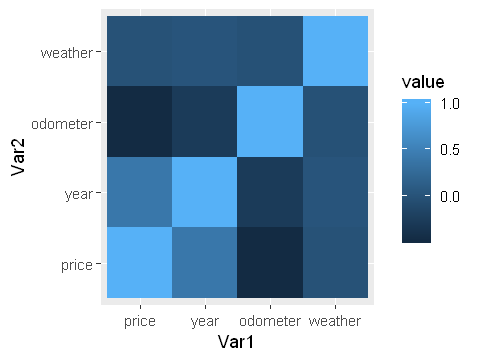

In [18]:
cols <- unlist(lapply(Cars, is.numeric))
cormat <- round(cor(Cars[,cols]),3)
melted_cormat <- melt(cormat)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + geom_tile()

#### Price

In [19]:
summary(Cars$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    4000    8500   11510   16100   49998 

Regarding prices there is not much expectation a part from some data possibly normally distributed with maybe some skewness to the right due to what we've seen earlier

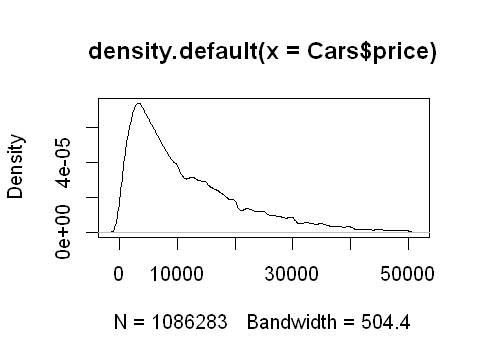

In [20]:
den <- density(Cars$price)
plot(den)

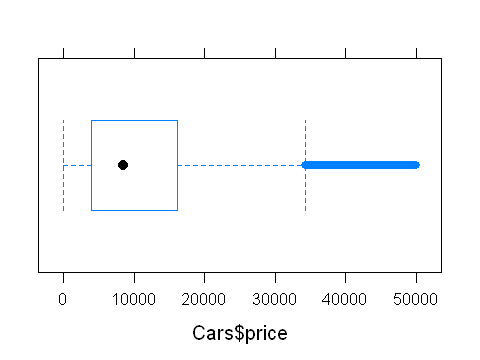

In [21]:
bwplot(Cars$price)

#### Year

In [22]:
summary(Cars$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1900    2004    2008    2007    2013    2019 

As for the year of the car already by looking at the summary we can see a strong presence of new cars being sold.

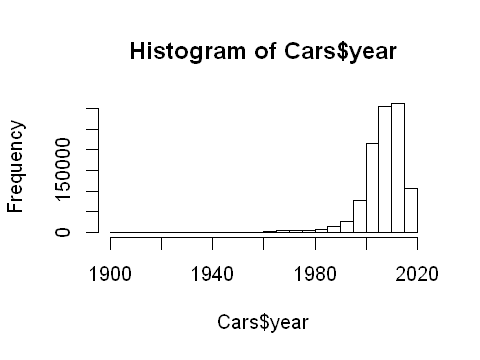

In [23]:
hist(Cars$year)

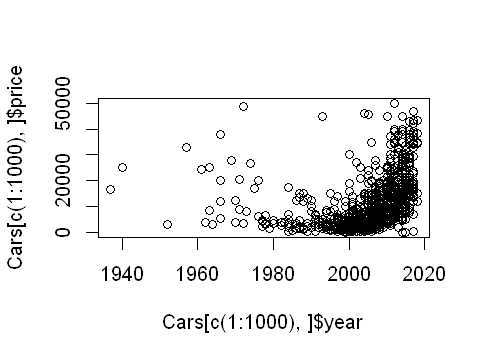

In [24]:
plot(Cars[c(1:1000),]$price~Cars[c(1:1000),]$year)

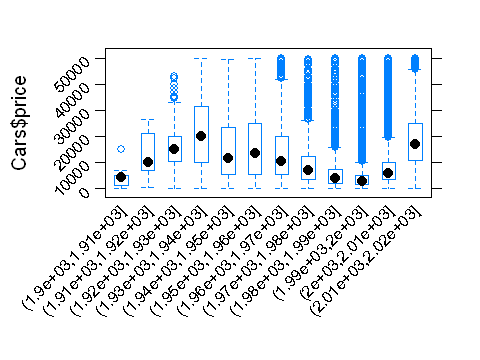

In [25]:
bwplot(Cars$price~cut(Cars$year, breaks = seq(1900,2020,by=10)), scales=list(y=list(rot=45), x=list(rot=45)))

#### Manufacturer

In [26]:
head(summary(Cars$manufacturer),10)

acura         alfa   alfa-romeo        aston aston-martin 
       54312        10547           47           82           16           28 
        audi          bmw        buick     cadillac 
       10254        29872        15048        16431

One thing about manufacturers that didn't came up straight away during data cleaning are duplicates. while this could bring some troubles in the process of assessing his correlation with the prices, a full check of duplicates is a huge work by any means therefore I've decided to ignore the issue for now and keep the information

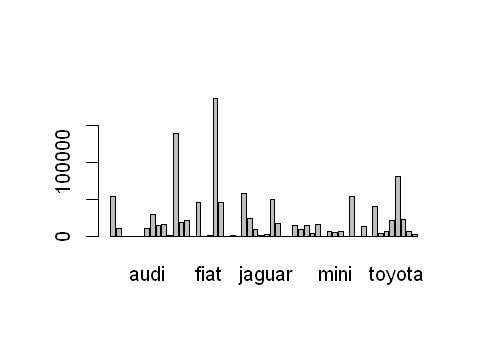

In [27]:
plot(Cars$manufacturer)

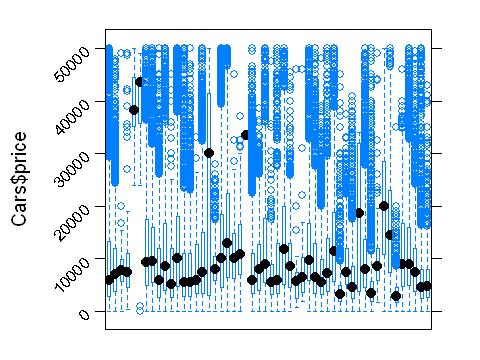

In [28]:
bwplot(Cars$price~Cars$manufacturer, scales=list(y=list(rot=45), x=list(draw=FALSE)))

In [29]:
Cars %>% 
  group_by(manufacturer) %>% 
  summarise(average = mean(price)) %>%
  arrange(desc(average)) %>%
  filter(average,average>15000)

manufacturer,average
aston,38185.81
aston-martin,36914.29
hennessey,33500.00
ferrari,25196.20
ram,20421.60
morgan,17850.25
rover,16157.09
gmc,15631.90


#### Make

In [30]:
head(summary(Cars$make),10)

f-150           1500 silverado 1500           2500 
         23232          17274          14216          12478           7835 
      wrangler        mustang         accord          camry      silverado 
          7702           7458           7396           7374           7243

In [31]:
length(levels(Cars$make))

[1] 107448

The make of the car could pose a huge threat on our success in building a useful predictive model given his great amount of categories and also the possibility of duplicates and typos as in manufacturers, therefore I will keep an eye on it and probably drop it as soon as possible

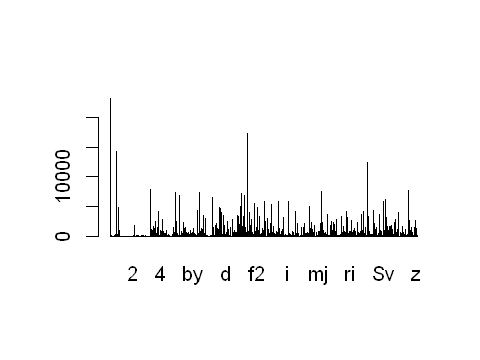

In [32]:
plot(Cars$make)

In [33]:
range <- quantile(Cars$price)
low <- range[2]
up <- range[4]
iqr <- up-low
upperbound <- (iqr*1.5)+up
upperbound

75% 
34250

In [34]:
Cars %>% 
  group_by(make) %>% 
  summarise(average = mean(price)) %>%
  arrange(desc(average)) %>%
  filter(average,average>34250) %>%
  tally()

n
2693


as we can see there are a great amount of categories with an average price over the outliers range of prices

#### Condition

In [35]:
summary(Cars$condition)

excellent      fair      good  like new       new   salvage 
   355763    333869     43406    273447     73208      3495      3095

As for the conditions of the car we see the first really interesting categorical variable. Just by the look of the distribution we can foresee a possible relationship between conditions and prices.

In addition to that I've decided not to ignore the fact taht almost a third of cars didn't have a condition in their description. This could be of some importance since we are evaluating what determines the price of the car on a e-commerce website

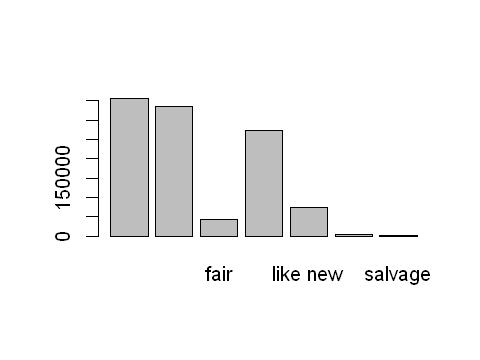

In [36]:
plot(Cars$condition)

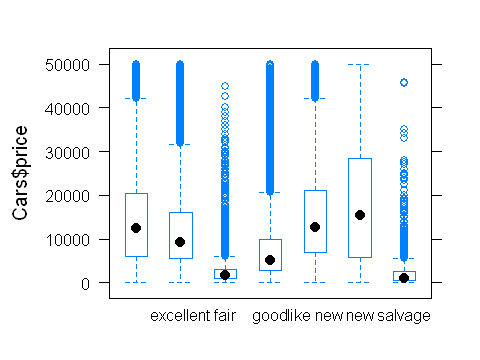

In [37]:
bwplot(Cars$price~Cars$condition)

As expected the cars in better conditions show a greater mean in prices

#### Cylinders

In [38]:
summary(Cars$cylinders)

10 cylinders 12 cylinders  3 cylinders  4 cylinders  5 cylinders 
      312616         4811          490         1206       226017         8320 
 6 cylinders  8 cylinders        other 
      275136       225716        31971

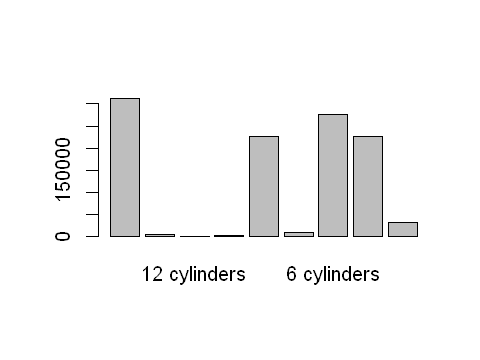

In [39]:
plot(Cars$cylinders)

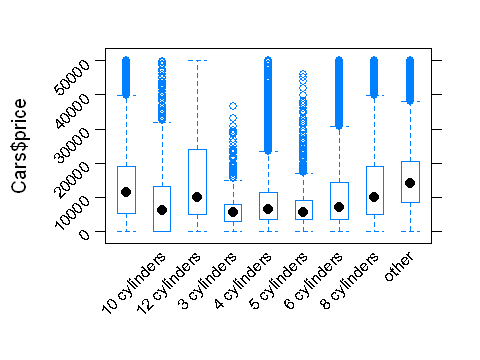

In [40]:
bwplot(Cars$price~Cars$cylinders, scales=list(y=list(rot=45), x=list(rot=45)))

While it seems that Cars with 12 cylinders have an average higher price, what is really interesting here is the anomalous behaviour of the 10 cylinders cars. The other categories follow a pretty simple relationship of more cylinders equal greater price.

#### Fuel

In [41]:
summary(Cars$fuel)

diesel electric      gas   hybrid    other 
    8300    68376     1237   964805     8189    35376

Clearly gas and diesel care are the most common around and the dataset behaves accordingly

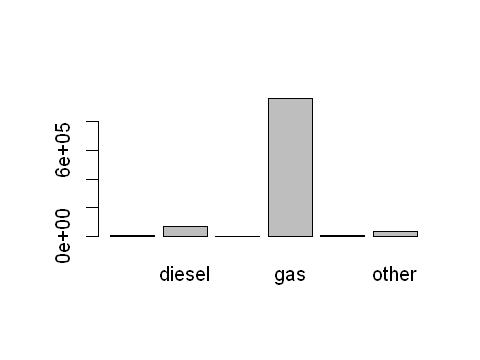

In [42]:
plot(Cars$fuel)

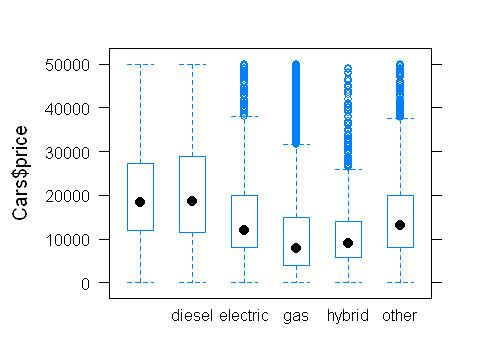

In [43]:
bwplot(Cars$price~Cars$fuel)

Gas cars are both the most common and the cheapest on the market, while electric cars seems to have an average cost a bit higher then the other categories

#### Odometer

In [44]:
summary(Cars$odometer)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   60000  107502  108469  151000  296078 

Odometer is surely both an interesting and simple variable since we'd expect to have a negative correlation between the number of miles run and the price of the car

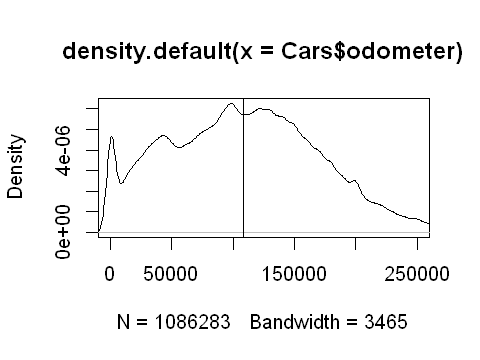

In [45]:
dens <- density(Cars$odometer)
plot(dens,xlim=c(0,250000))
abline(v=mean(Cars$odometer))

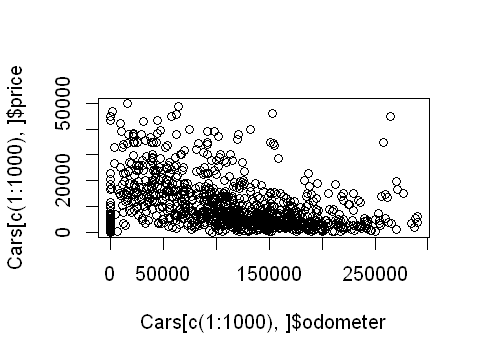

In [46]:
plot(Cars[c(1:1000),]$price~Cars[c(1:1000),]$odometer)

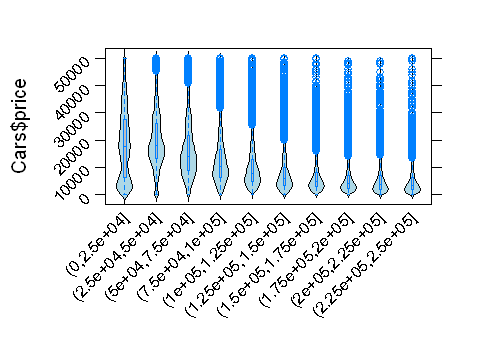

In [47]:
bwplot(Cars$price~cut(Cars$odometer, breaks = seq(0,250000,by=25000)), scales=list(y=list(rot=45), x=list(rot=45)),panel = function(..., box.ratio) {
 panel.violin(..., col = "lightblue",
 varwidth = FALSE, box.ratio = box.ratio)
 panel.bwplot(..., col='black',
 cex=0.8, pch='|', fill='gray', box.ratio = .1)
 })

In [48]:
cor(Cars$price,Cars$odometer)

[1] -0.4778654

#### Title Status

In [49]:
summary(Cars$title_status)

clean       lien    missing parts only    rebuilt    salvage 
      1225    1018046      14605       2111        871      30900      18525

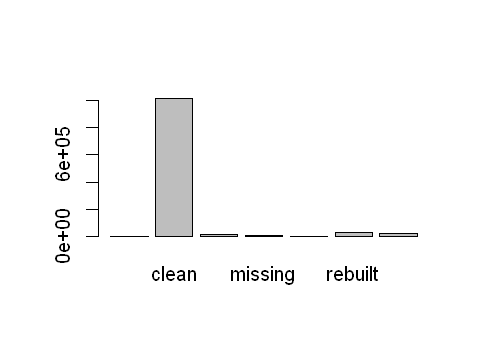

In [50]:
plot(Cars$title_status)

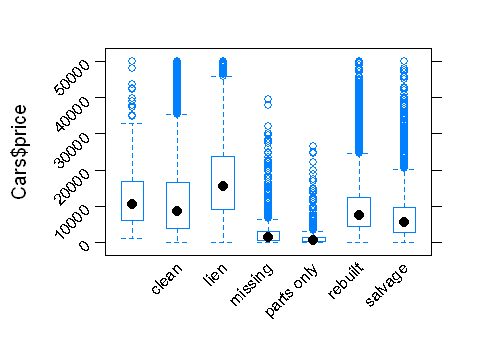

In [51]:
bwplot(Cars$price~Cars$title_status, scales=list(y=list(rot=45), x=list(rot=45)))

Cars with missing parts or only parts have quite a drop in the mean with respect to the other groups. On the other side lien cars seems to be the ones with the highest prices.

#### Transmission

In [52]:
summary(Cars$transmission)

automatic    manual     other 
     6899    955789    102142     21453

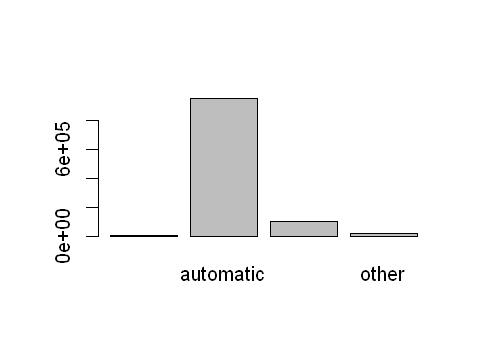

In [53]:
plot(Cars$transmission)

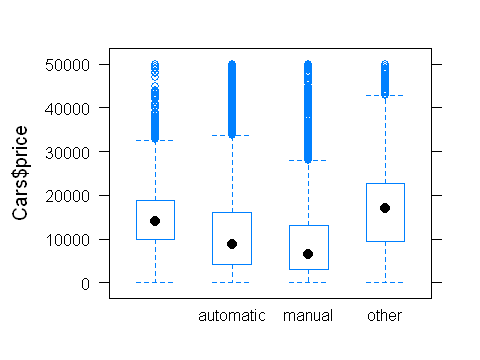

In [54]:
bwplot(Cars$price~Cars$transmission)

Both automatic and manual cars seems to be the most common, even though there is a large amount of unlabeled cars and other types of transmissions.

#### Drive

In [55]:
summary(Cars$drive)

4wd    fwd    rwd 
270055 345590 297921 172717

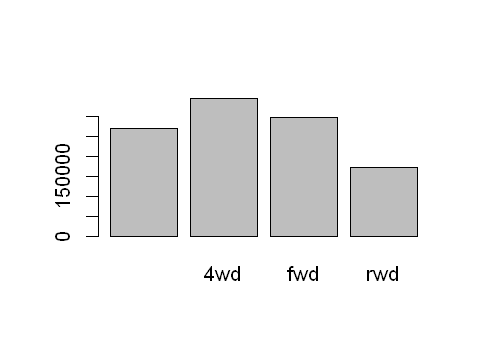

In [56]:
plot(Cars$drive)

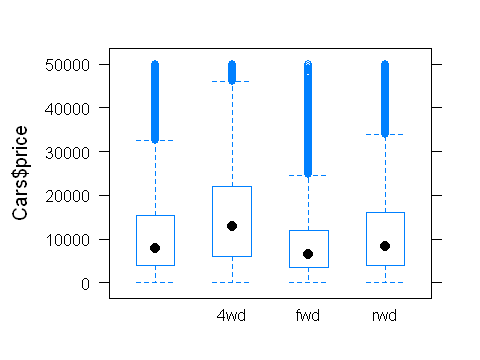

In [57]:
bwplot(Cars$price~Cars$drive)

By analyzing the cost related to the type of drive an interesting behavior appears. Rear wheel drive cars cost more than forward wheel drive cars. If we make the assumption that rwd cars are in general older than fwd cars this goes againts the assumption we made earlier about the correlation between price and year. This may be due to the fact that rwd cars are considered vintage in most cases, therefore cost more.

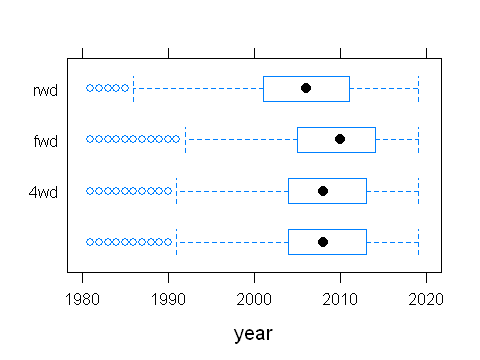

In [58]:
bwplot(drive~year, data=Cars[Cars$year>1980,])

This boxplot confirms our hypotesis that rwd cars are in general older than fwd cars.

#### Type

In [59]:
summary(Cars$type)

bus convertible       coupe   hatchback    mini-van 
     281161        1242       23171       52704       30039       19510 
    offroad       other      pickup       sedan         SUV       truck 
       3081       17085       96839      221136      200476       98465 
        van       wagon 
      19970       21404

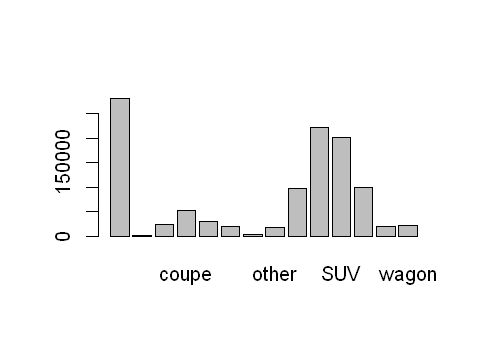

In [60]:
plot(Cars$type)

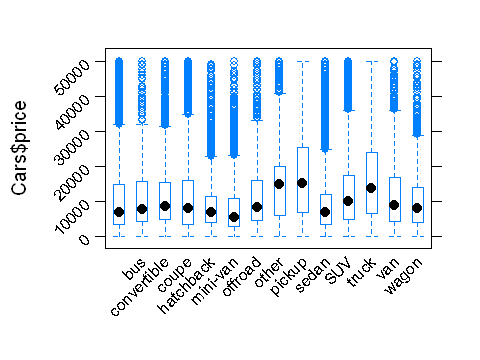

In [61]:
bwplot(Cars$price~Cars$type, scales=list(y=list(rot=45), x=list(rot=45)))

#### Paint Color

In [62]:
summary(Cars$paint_color)

black   blue  brown custom  green   grey orange purple    red silver 
293237 155817  88775  20132  20001  30578  78172   4958   2694  87990 120841 
 white yellow 
175667   7421

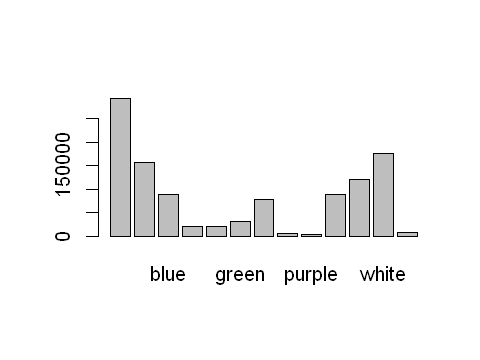

In [63]:
plot(Cars$paint_color)

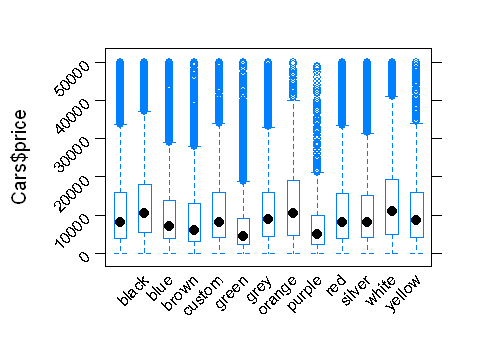

In [64]:
bwplot(Cars$price~Cars$paint_color, scales=list(y=list(rot=45), x=list(rot=45)))

With the previous plots we can se an overall majority of the classic colors (white, black, silver, grey), while the highest prices seems to belong to the orange color, maybe for his rarity.

#### Weather

In [65]:
summary(Cars$weather)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   48.00   53.00   53.41   59.00   79.00 

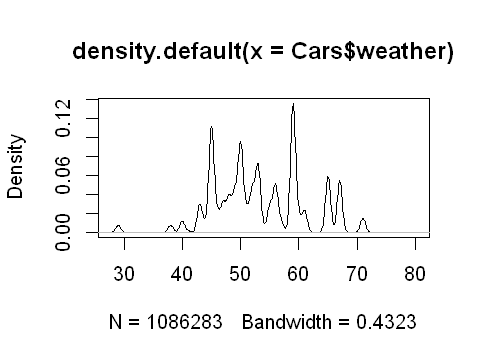

In [66]:
den <- density(Cars$weather)
plot(den)

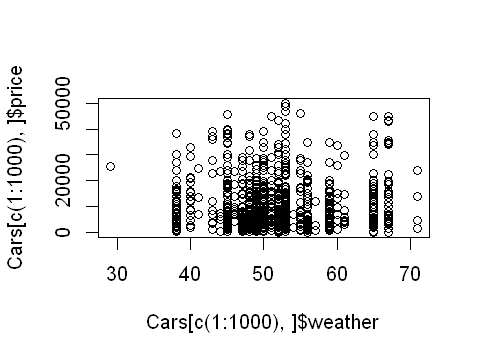

In [67]:
plot(Cars[c(1:1000),]$price~Cars[c(1:1000),]$weather)

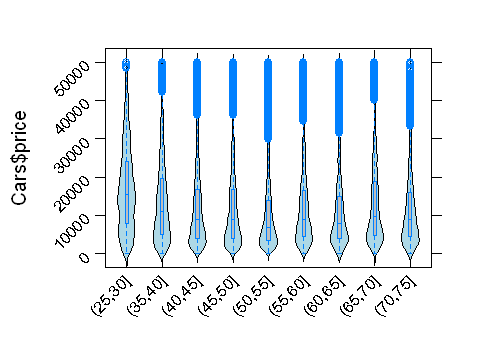

In [68]:
bwplot(Cars$price~cut(Cars$weather, breaks = seq(20,75,by=5)), scales=list(y=list(rot=45), x=list(rot=45)),panel = function(..., box.ratio) {
 panel.violin(..., col = "lightblue",
 varwidth = FALSE, box.ratio = box.ratio)
 panel.bwplot(..., col='black',
 cex=0.8, pch='|', fill='gray', box.ratio = .1)
 })

In [69]:
cor(Cars$price,Cars$weather)

[1] -0.01363034

Weather was the variable for which I had the highest hopes in seing some interesting behaviours, but in the end it came to be one of the least meaningful conditions when it comes to car prices

## Model Data

### Subsetting

In [70]:
set.seed(123)
test_ind <- sample(seq_len(nrow(Cars)), size = 500000)
validate_ind <- sample(seq_len(nrow(Cars)), size = 50000)
Cars.temp <- Cars
numsC <- unlist(lapply(Cars, is.numeric))
Cars.temp[,numsC] <- apply(Cars[,numsC],2,scale)
Test <- Cars[test_ind,]
numsT <- unlist(lapply(Test, is.numeric))
Test[,numsT] <- apply(Test[,numsT],2,scale)
Validate <- Cars[validate_ind,]
numsV <- unlist(lapply(Validate, is.numeric))
Validate[,numsV] <- apply(Validate[,numsV],2,scale)

### Analysis of regressors

Since we have quite a few regressors we can already watch how they behave singularly in order to remove the less influential ones and get a lighter model to begin with

#### Year

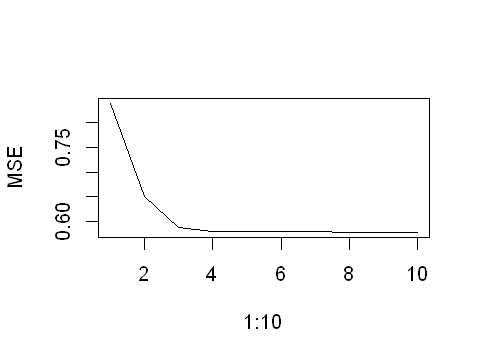

In [71]:
MSE <- c()
for(i in 1:10){
  lm.fit <- lm(price~poly(year, degree=i), data=Test)
  y.pred <- predict(lm.fit, newdata=Validate)
  mse <- mean((Validate$price-y.pred)^2)
  MSE <-  c(MSE, mse)
}
plot(1:10,MSE,type="l")

In [72]:
mod.out.lin <- lm(price~year,data=Test)

In [73]:
mod.out <- lm(price~poly(year,4),data=Test)
summary(mod.out)


Call:
lm(formula = price ~ poly(year, 4), data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0473 -0.4322 -0.1625  0.3018  4.8200 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.596e-16  1.069e-03    0.00        1    
poly(year, 4)1  2.851e+02  7.558e-01  377.23   <2e-16 ***
poly(year, 4)2  3.142e+02  7.558e-01  415.75   <2e-16 ***
poly(year, 4)3  1.758e+02  7.558e-01  232.57   <2e-16 ***
poly(year, 4)4  5.923e+01  7.558e-01   78.38   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7558 on 499995 degrees of freedom
Multiple R-squared:  0.4288,	Adjusted R-squared:  0.4288 
F-statistic: 9.385e+04 on 4 and 499995 DF,  p-value: < 2.2e-16


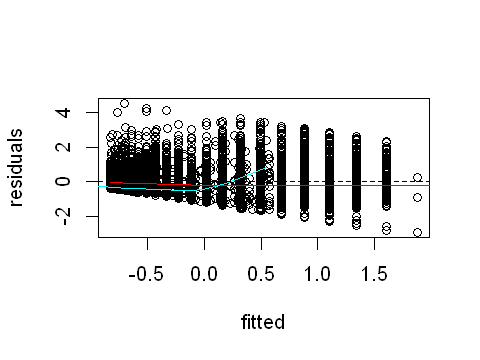

In [74]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out)),col='red')
lines(loess.smooth(fitted(mod.out.lin),residuals(mod.out.lin)),col='cyan')
abline(h=0,lty=2)

#### Manufacturer

In [75]:
mod.out <- lm(price~manufacturer, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ manufacturer, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7675 -0.6774 -0.2304  0.4744  4.6221 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -0.175213   0.006017 -29.118  < 2e-16 ***
manufactureracura           -0.105126   0.014825  -7.091 1.33e-12 ***
manufactureralfa            -0.149588   0.254758  -0.587 0.557085    
manufactureralfa-romeo       0.213382   0.161191   1.324 0.185574    
manufactureraston            2.768870   0.301410   9.186  < 2e-16 ***
manufactureraston-martin     2.749184   0.246125  11.170  < 2e-16 ***
manufactureraudi             0.224517   0.015272  14.701  < 2e-16 ***
manufacturerbmw              0.223973   0.010117  22.139  < 2e-16 ***
manufacturerbuick           -0.179384   0.012898 -13.908  < 2e-16 ***
manufacturercadillac         0.146665   0.012545  11.691  < 2e-16 ***
manufacturerchev            -0.150722   0.075344  -2.000 0.045451 

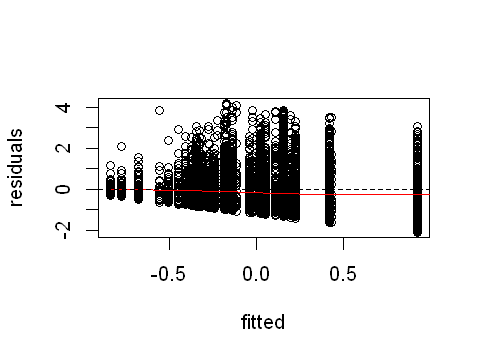

In [76]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out)),col='red')
abline(h=0,lty=2)

#### Make

Make as expected carries too much information and too many categories making it impossible to analyze. The minimum size of data to produce a linear model which includes all the categories is too big for R itself to handle. Moreover it would be of little use taking a very small portion of data and test it against itself to avoid categories collision.

#### Condition

In [77]:
mod.out <- lm(price~condition, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ condition, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8286 -0.6212 -0.2144  0.4287  4.4799 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         0.324456   0.002309  140.518   <2e-16 ***
conditionexcellent -0.295177   0.003322  -88.850   <2e-16 ***
conditionfair      -1.266153   0.007044 -179.743   <2e-16 ***
conditiongood      -0.733111   0.003501 -209.420   <2e-16 ***
conditionlike new   0.055675   0.005600    9.942   <2e-16 ***
conditionnew        0.310665   0.023292   13.338   <2e-16 ***
conditionsalvage   -1.259359   0.025189  -49.996   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9352 on 499993 degrees of freedom
Multiple R-squared:  0.1255,	Adjusted R-squared:  0.1255 
F-statistic: 1.196e+04 on 6 and 499993 DF,  p-value: < 2.2e-16


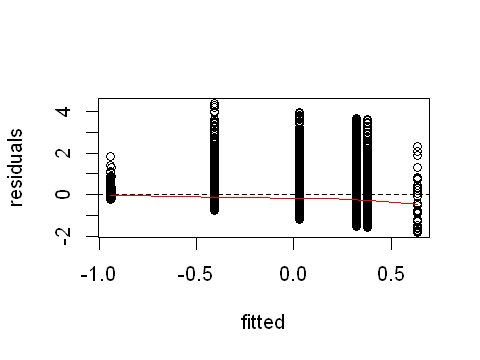

In [78]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out)),col='red')
abline(h=0,lty=2)

#### Cylinders

In [79]:
mod.out <- lm(price~cylinders, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ cylinders, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6219 -0.6955 -0.2562  0.4849  4.3490 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)            0.227500   0.002550   89.221   <2e-16 ***
cylinders10 cylinders -0.489071   0.020814  -23.497   <2e-16 ***
cylinders12 cylinders  0.161826   0.065780    2.460   0.0139 *  
cylinders3 cylinders  -0.780716   0.042136  -18.528   <2e-16 ***
cylinders4 cylinders  -0.585075   0.003944 -148.338   <2e-16 ***
cylinders5 cylinders  -0.727200   0.015715  -46.275   <2e-16 ***
cylinders6 cylinders  -0.377009   0.003728 -101.121   <2e-16 ***
cylinders8 cylinders  -0.038816   0.003938   -9.857   <2e-16 ***
cylindersother         0.200910   0.008412   23.885   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9683 on 499991 degrees of freedom
Multiple R-squared:  0.06248,	Adjusted R-squared:  0.06246 


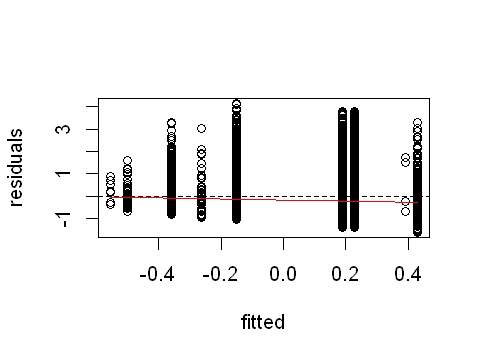

In [80]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out),span=60),col='red')
abline(h=0,lty=2)

#### Fuel

In [81]:
mod.out <- lm(price~fuel, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ fuel, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1471 -0.7059 -0.2806  0.4715  4.0814 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.89486    0.01545  57.926  < 2e-16 ***
fueldiesel    0.05872    0.01637   3.587 0.000335 ***
fuelelectric -0.41514    0.04276  -9.710  < 2e-16 ***
fuelgas      -0.98314    0.01552 -63.365  < 2e-16 ***
fuelhybrid   -1.01631    0.02193 -46.349  < 2e-16 ***
fuelother    -0.53403    0.01718 -31.076  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9618 on 499994 degrees of freedom
Multiple R-squared:  0.075,	Adjusted R-squared:  0.07499 
F-statistic:  8108 on 5 and 499994 DF,  p-value: < 2.2e-16


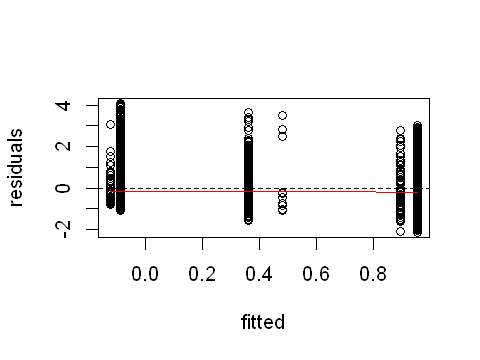

In [82]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out),span=60),col='red')
abline(h=0,lty=2)

#### Odometer

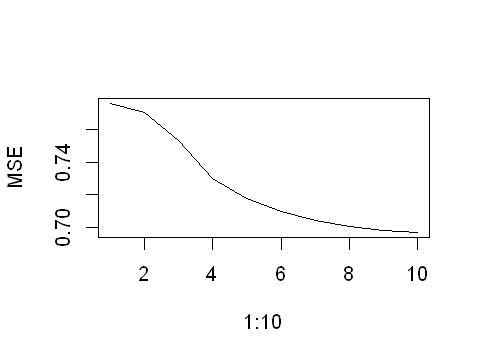

In [83]:
MSE <- c()
for(i in 1:10){
  lm.fit <- lm(price~poly(odometer, degree=i), data=Test)
  y.pred <- predict(lm.fit, newdata=Validate)
  mse <- mean((Validate$price-y.pred)^2)
  MSE <-  c(MSE, mse)
}
plot(1:10,MSE,type="l")

In [84]:
mod.out.lin <- lm(price~odometer,data=Test)

In [85]:
mod.out <- lm(price~poly(odometer, 9),data=Test)
summary(mod.out)


Call:
lm(formula = price ~ poly(odometer, 9), data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4565 -0.4925 -0.1906  0.3457  4.6463 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -6.462e-17  1.180e-03    0.00        1    
poly(odometer, 9)1 -3.374e+02  8.342e-01 -404.44   <2e-16 ***
poly(odometer, 9)2  5.940e+01  8.342e-01   71.21   <2e-16 ***
poly(odometer, 9)3  9.249e+01  8.342e-01  110.88   <2e-16 ***
poly(odometer, 9)4 -1.058e+02  8.342e-01 -126.79   <2e-16 ***
poly(odometer, 9)5  7.786e+01  8.342e-01   93.33   <2e-16 ***
poly(odometer, 9)6 -6.036e+01  8.342e-01  -72.36   <2e-16 ***
poly(odometer, 9)7  4.918e+01  8.342e-01   58.96   <2e-16 ***
poly(odometer, 9)8 -4.007e+01  8.342e-01  -48.04   <2e-16 ***
poly(odometer, 9)9  3.552e+01  8.342e-01   42.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8342 on 499990 degrees of freedom
Multiple R-squared: 

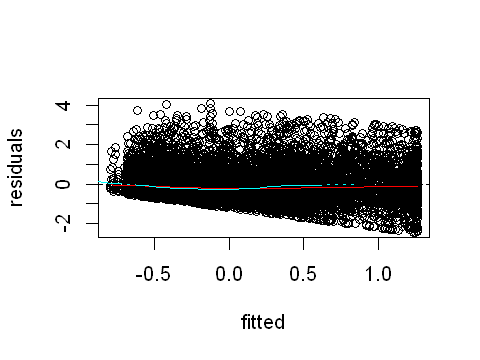

In [86]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out)),col='red')
lines(loess.smooth(fitted(mod.out.lin),residuals(mod.out.lin)),col='cyan')
abline(h=0,lty=2)

#### Title Status

In [87]:
mod.out <- lm(price~title_status, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ title_status, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7987 -0.7563 -0.2791  0.4834  4.4306 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.06731    0.04156   1.620    0.105    
title_statusclean      -0.05854    0.04158  -1.408    0.159    
title_statuslien        0.53790    0.04329  12.426  < 2e-16 ***
title_statusmissing    -0.98330    0.05231 -18.799  < 2e-16 ***
title_statusparts only -1.07484    0.06469 -16.616  < 2e-16 ***
title_statusrebuilt    -0.29049    0.04238  -6.854 7.21e-12 ***
title_statussalvage    -0.50481    0.04292 -11.761  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9939 on 499993 degrees of freedom
Multiple R-squared:  0.01216,	Adjusted R-squared:  0.01215 
F-statistic:  1026 on 6 and 499993 DF,  p-value: < 2.2e-16


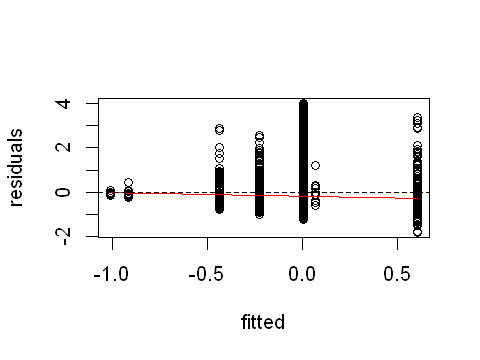

In [88]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out),span=60),col='red')
abline(h=0,lty=2)

#### Transmission

In [89]:
mod.out <- lm(price~transmission, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ transmission, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7325 -0.7347 -0.2982  0.4588  4.2057 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.41436    0.01754  23.619  < 2e-16 ***
transmissionautomatic -0.40694    0.01761 -23.112  < 2e-16 ***
transmissionmanual    -0.62686    0.01814 -34.564  < 2e-16 ***
transmissionother      0.12464    0.02019   6.173  6.7e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9944 on 499996 degrees of freedom
Multiple R-squared:  0.01112,	Adjusted R-squared:  0.01112 
F-statistic:  1875 on 3 and 499996 DF,  p-value: < 2.2e-16


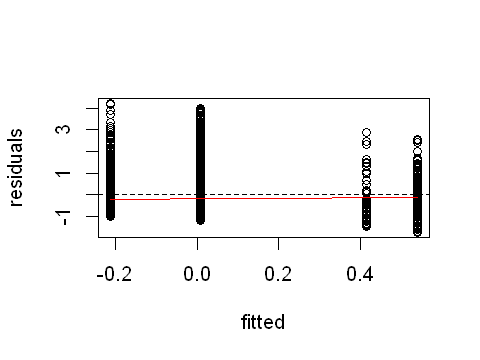

In [90]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out),span=60),col='red')
abline(h=0,lty=2)

#### Drive

In [91]:
mod.out <- lm(price~drive, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ drive, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5652 -0.6888 -0.2323  0.5062  4.3444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.064021   0.002716 -23.570  < 2e-16 ***
drive4wd     0.435723   0.003630 120.046  < 2e-16 ***
drivefwd    -0.287270   0.003757 -76.472  < 2e-16 ***
driverwd     0.026021   0.004355   5.975  2.3e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9597 on 499996 degrees of freedom
Multiple R-squared:  0.07892,	Adjusted R-squared:  0.07891 
F-statistic: 1.428e+04 on 3 and 499996 DF,  p-value: < 2.2e-16


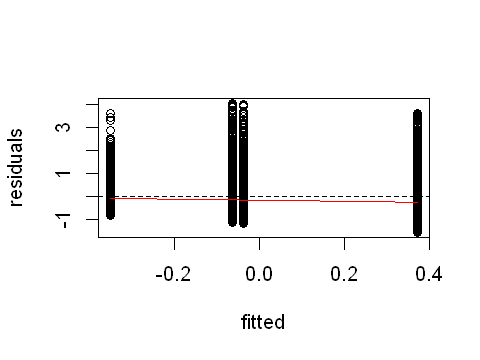

In [92]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out),span=60),col='red')
abline(h=0,lty=2)

#### Type

In [93]:
mod.out <- lm(price~type, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ type, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7628 -0.6865 -0.2509  0.4816  4.3704 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.099248   0.002664 -37.261  < 2e-16 ***
typebus          0.121039   0.040521   2.987  0.00282 ** 
typeconvertible  0.076220   0.009665   7.886 3.12e-15 ***
typecoupe        0.040643   0.006711   6.056 1.39e-09 ***
typehatchback   -0.235491   0.008599 -27.387  < 2e-16 ***
typemini-van    -0.278346   0.010439 -26.665  < 2e-16 ***
typeoffroad      0.143012   0.025348   5.642 1.68e-08 ***
typeother        0.390711   0.011051  35.356  < 2e-16 ***
typepickup       0.668540   0.005264 127.002  < 2e-16 ***
typesedan       -0.221187   0.004016 -55.074  < 2e-16 ***
typeSUV          0.187625   0.004133  45.401  < 2e-16 ***
typetruck        0.563431   0.005221 107.917  < 2e-16 ***
typevan          0.075753   0.010307   7.349 1.99e-13 ***
typewagon       -0.078573   0.01

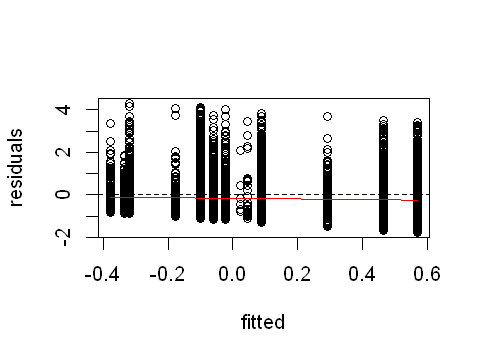

In [94]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out),span=60),col='red')
abline(h=0,lty=2)

#### Paint Color

In [95]:
mod.out <- lm(price~paint_color, data=Test)
summary(mod.out)


Call:
lm(formula = price ~ paint_color, data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3989 -0.7344 -0.2944  0.4894  4.4252 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.033537   0.002692 -12.459  < 2e-16 ***
paint_colorblack   0.196189   0.004571  42.919  < 2e-16 ***
paint_colorblue   -0.142941   0.005582 -25.606  < 2e-16 ***
paint_colorbrown  -0.186964   0.010616 -17.611  < 2e-16 ***
paint_colorcustom -0.009874   0.010667  -0.926 0.354618    
paint_colorgreen  -0.398859   0.008798 -45.335  < 2e-16 ***
paint_colorgrey    0.021469   0.005878   3.653 0.000259 ***
paint_colororange  0.170838   0.020911   8.170 3.10e-16 ***
paint_colorpurple -0.380457   0.028167 -13.507  < 2e-16 ***
paint_colorred    -0.027091   0.005611  -4.828 1.38e-06 ***
paint_colorsilver -0.052927   0.004980 -10.628  < 2e-16 ***
paint_colorwhite   0.238936   0.004397  54.343  < 2e-16 ***
paint_coloryellow -0.014030   0.017184  -0.816 0.414225  

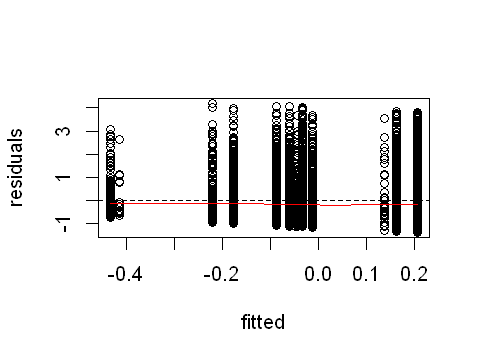

In [96]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out)),col='red')
abline(h=0,lty=2)

#### Weather

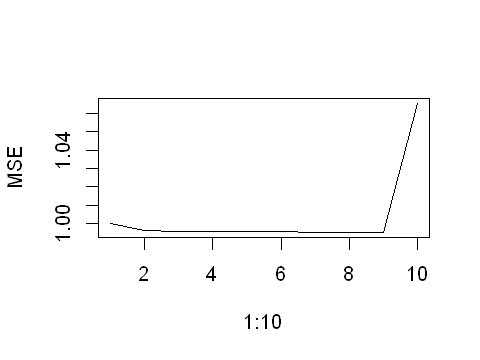

In [97]:
MSE <- c()
for(i in 1:10){
  lm.fit <- lm(price~poly(weather, degree=i), data=Test)
  y.pred <- predict(lm.fit, newdata=Validate)
  mse <- mean((Validate$price-y.pred)^2)
  MSE <-  c(MSE, mse)
}
plot(1:10,MSE,type="l")

In [98]:
mod.out <- lm(price~poly(weather,2),data=Test)
summary(mod.out)


Call:
lm(formula = price ~ poly(weather, 2), data = Test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6675 -0.7556 -0.3093  0.4967  4.0412 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.119e-16  1.411e-03   0.000        1    
poly(weather, 2)1 -9.648e+00  9.980e-01  -9.667   <2e-16 ***
poly(weather, 2)2  4.331e+01  9.980e-01  43.398   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.998 on 499997 degrees of freedom
Multiple R-squared:  0.003938,	Adjusted R-squared:  0.003934 
F-statistic: 988.4 on 2 and 499997 DF,  p-value: < 2.2e-16


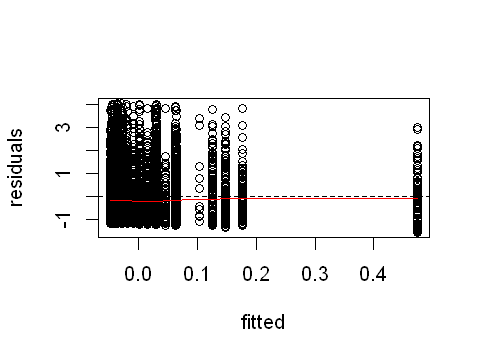

In [99]:
plot(fitted(mod.out)[c(1:10000)],residuals(mod.out)[c(1:10000)],xlab='fitted',ylab='residuals')
lines(loess.smooth(fitted(mod.out),residuals(mod.out)),col='red')
abline(h=0,lty=2)

### Linear Model

At first i've tried to model a simple linear model with the following regressors:
* year
* manufacturer
* condition
* cylinder
* fuel
* odometer
* title_status
* transmission
* drive
* type
* paint_color

In [100]:
names(Cars)

[1] "price"        "year"         "manufacturer" "make"         "condition"   
 [6] "cylinders"    "fuel"         "odometer"     "title_status" "transmission"
[11] "drive"        "type"         "paint_color"  "weather"

In [101]:
lm.out <- lm(price~year+manufacturer+condition+cylinders+fuel+odometer+title_status+transmission+drive+type+paint_color,data=Test)

In [102]:
lm.out.poly <- lm(price~poly(year,4)+manufacturer+condition+cylinders+fuel+poly(odometer,9)+title_status+transmission+drive+type+paint_color,data=Test)

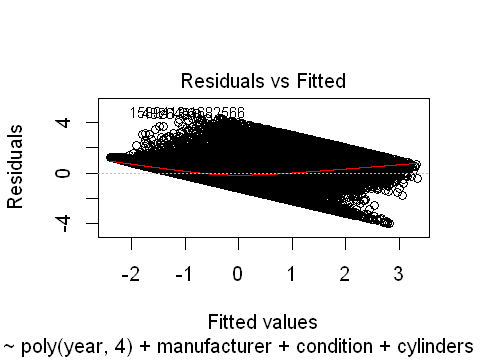

In [129]:
plot(lm.out.poly,which=1)

#### MSE

In [104]:
mean(lm.out.poly$residuals^2)

[1] 0.3113833

In [105]:
y.pred <- predict(lm.out,newdata=Validate,type='response')
y.pred.poly <- predict(lm.out.poly,newdata=Validate,type='response')
mse <- mean((Validate$price-y.pred)^2)
mse.poly <- mean((Validate$price-y.pred.poly)^2)
mse
mse.poly

[1] 0.4360756

[1] 0.3135184

### Lasso and Ridge regression

Lasso and Ridge regression are some of the simpler techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

In [106]:
x <- model.matrix(price~year+manufacturer+condition+cylinders+fuel+odometer+title_status+transmission+drive+type+paint_color, Cars.temp)[,-1]
x.poly <- model.matrix(price~poly(year,4)+manufacturer+condition+cylinders+fuel+poly(odometer,9)+title_status+transmission+drive+type+paint_color, Cars.temp)[,-1]
y <- Cars.temp$price
# lambda <- 10^seq(10, -2, length = 100)

In [107]:
set.seed(489)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)
ytest = y[test]

##### Ridge

In [108]:
ridge.mod <- glmnet(x[train,], y[train], alpha = 0)
cv.out <- cv.glmnet(x[train,], y[train], alpha = 0)
bestlam <- cv.out$lambda.min
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test,])
mean((ridge.pred-ytest)^2)

[1] 0.4347557

In [109]:
ridge.mod <- glmnet(x.poly[train,], y[train], alpha = 0)
cv.out <- cv.glmnet(x.poly[train,], y[train], alpha = 0)
bestlam <- cv.out$lambda.min
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x.poly[test,])
mean((ridge.pred-ytest)^2)

[1] 0.3120861

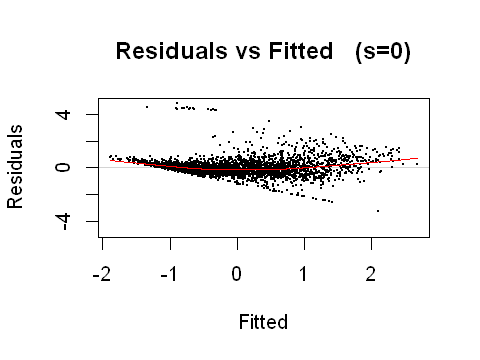

In [110]:
plotres(ridge.mod,which=3)

##### Lasso

In [111]:
ridge.mod <- glmnet(x[train,], y[train], alpha = 1)
cv.out <- cv.glmnet(x[train,], y[train], alpha = 1)
bestlam <- cv.out$lambda.min
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test,])
mean((ridge.pred-ytest)^2)

[1] 0.4340082

In [112]:
ridge.mod <- glmnet(x.poly, y, alpha = 1)
ridge.mod <- glmnet(x.poly[train,], y[train], alpha = 1)
cv.out <- cv.glmnet(x.poly[train,], y[train], alpha = 1)
bestlam <- cv.out$lambda.min
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x.poly[test,])
mean((ridge.pred-ytest)^2)

[1] 0.3110792

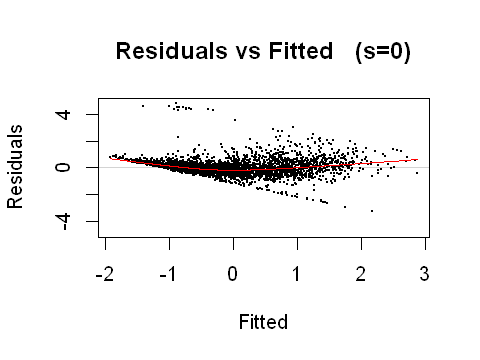

In [113]:
plotres(ridge.mod,which=3)

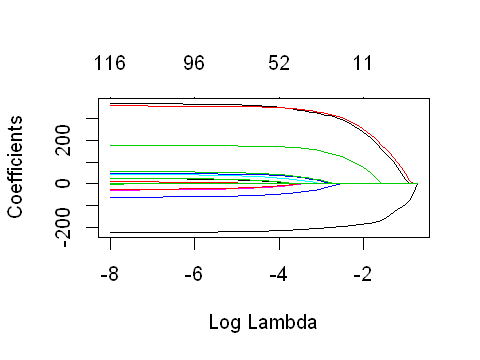

In [114]:
plot(ridge.mod,'lambda',label=TRUE)

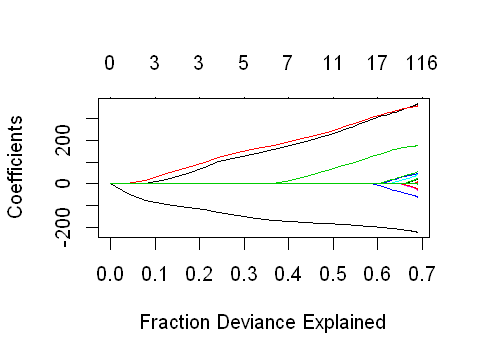

In [115]:
plot(ridge.mod,'dev',label=TRUE)

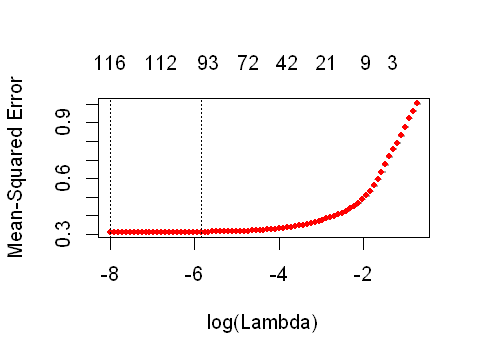

In [116]:
plot(cv.out)

In [117]:
coef.cv.out <- coef(cv.out)
coef.cv.out@Dimnames[[1]][which(coef.cv.out == 0 ) ]

[1] "manufactureralfa"         "manufactureralfa-romeo"  
 [3] "manufacturerchev"         "manufacturerchevrolet"   
 [5] "manufacturerdatsun"       "manufacturerharley"      
 [7] "manufacturerhennessey"    "manufacturerinfinity"    
 [9] "manufacturerland rover"   "manufacturerlandrover"   
[11] "manufacturermercedesbenz" "manufacturermorgan"      
[13] "manufacturernoble"        "manufacturerpontiac"     
[15] "manufacturerporche"       "manufacturervolvo"       
[17] "conditionlike new"        "transmissionautomatic"   
[19] "typebus"                  "typeother"               
[21] "typeSUV"                  "typevan"                 
[23] "paint_colorbrown"         "paint_colorgreen"        
[25] "paint_colorgrey"          "paint_colorpurple"       
[27] "paint_colorred"           "paint_colorsilver"

##### Reduced Lasso

In [122]:
x.poly.redu <- model.matrix(price~poly(year,2)+condition+cylinders+fuel+poly(odometer,2)+title_status+transmission+drive, Cars.temp)[,-1]

In [127]:
ridge.mod <- glmnet(x.poly.redu, y, alpha = 1)
ridge.mod <- glmnet(x.poly.redu[train,], y[train], alpha = 1)
cv.out <- cv.glmnet(x.poly.redu[train,], y[train], alpha = 1)
bestlam <- cv.out$lambda.min
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x.poly.redu[test,])
mean((ridge.pred-ytest)^2)

[1] 0.3889024

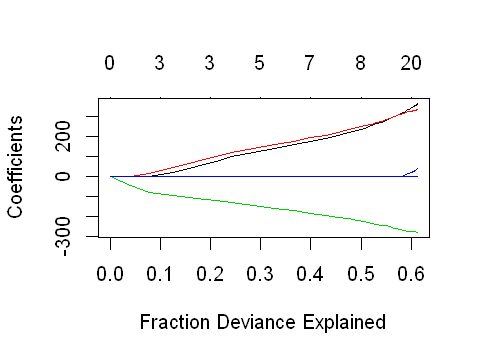

In [125]:
plot(ridge.mod,'dev',label=TRUE)

## Final Notes

This was an interesting dataset to takle, however its multidimensionality and its large number of features forced me to focus my attention in a particular direction ignoring some features that in my opinion where not interesting in the "grand scheme". Nonetheless it could be a fun challenge to try and include those dimensions and maybe drop some other aspects to obtain a different perspective on the problem and even maybe a better prediction model.